In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.linalg import svd
import h5py
import sympy as sym


# №1

![](img/num_3_1.jpg)

# №2

![](img/num_3_2.jpg)

Решение системы уравнений:
[[ 0.05454545]
 [ 0.04242424]
 [ 0.03030303]
 [ 0.01818182]
 [ 0.00606061]
 [-0.00606061]
 [-0.01818182]
 [-0.03030303]
 [-0.04242424]
 [-0.05454545]]


-9.71445146547012e-17

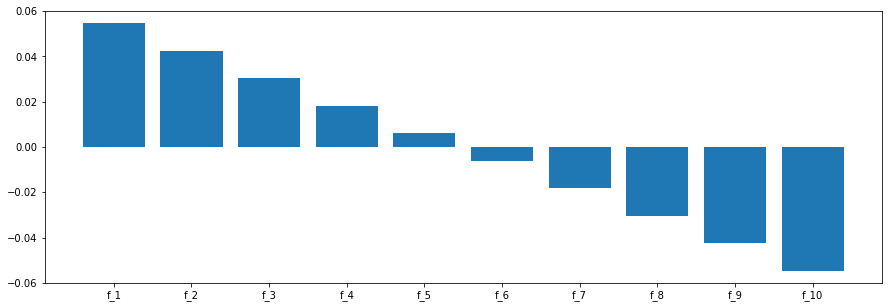

In [2]:
# Задаём матрицы, как в условии и A, как мы ее вывели
A = np.array([np.array(list(range(19, 0, -2)))/2, np.ones(10)])
B  = np.array([np.array([1.0]), np.array([0.0])]) # a по условию
# Выполняем сингулярное разложение матрицы A
U, S, V_transpose = np.linalg.svd(A)
# Используем первые две строки матрицы U.T и первые два столбца матрицы V_transpose.T
rank2 = np.linalg.matrix_rank(A)
f = np.dot(np.dot(np.dot(V_transpose[:rank2, :].T, np.linalg.inv(np.diag(S[:rank2]))), U.T[:rank2, :]), B)
print("Решение системы уравнений:")
print(f)
plt.figure(figsize = (15, 5))
plt.bar([f"f_{i}" for i in range(1, 11)], f.reshape(1, 10)[0])
# симметричные воздействия

sum(f)[0] # должна быть равна 0, тк 
# delta p = 0 = sum (f_i*delta t) = delta t * sum (f_i)

# №3

In [3]:
def solve_svd(A: np.array, B: np.array):
    # Выполняем сингулярное разложение матрицы A
    U, S, V_transpose = np.linalg.svd(A)
    rank = np.linalg.matrix_rank(A)
    print("A rank:", rank)
    # Используем первые две строки матрицы U.T и первые два столбца матрицы V_transpose.T
    return np.dot(np.dot(np.dot(V_transpose[:rank, :].T, np.linalg.inv(np.diag(S[:rank]))), U.T[:rank, :]), B)

q = np.sqrt(2)
A1 = np.array([[1/q, -1/q], [1/2, 1/2], [-1/2, -1/2]])
B1 = np.array([np.array([1.0]), np.array([0.0]), np.array([1.0])])

A2 = np.array([[1/q, 1/2, -1/2], [-1/q, 1/2, -1/2]])  # полноранговая
B2 = np.array([np.array([1.0]), np.array([- 1.0])])


In [4]:
X1 = solve_svd(A1, B1)
print("res:", X1.reshape(1, 2)[0])
# assert np.isclose((A1@X1), B1).all() # не проходит, так как система на самом деле несовместна:
#  x1/2 + x2/2 = 0 --> x1 + x2 = 0
# -x1/2 - x2/2 = 1 --> x1 + x2 = -2

A rank: 2
res: [ 0.20710678 -1.20710678]


In [5]:
X2 = solve_svd(A2, B2)
print("res:", X2.reshape(1, 3)[0])
assert np.isclose((A2@X2), B2).all() # в этом случае система нормально решается и результат правильный

A rank: 2
res: [ 1.41421356e+00 -1.11022302e-16  1.11022302e-16]


# №4

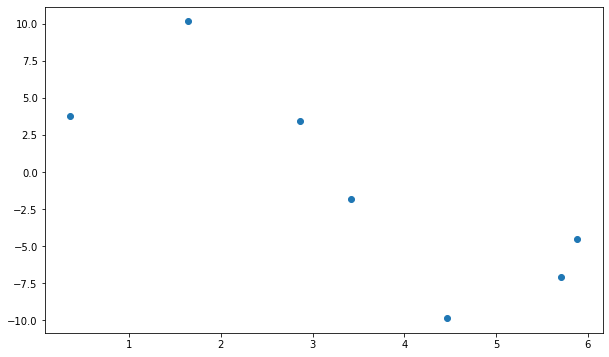

In [6]:
n = 7
x = np.random.uniform(0, 6, n)

y = 10 * np.sin(x) + np.random.normal(0, 1, len(x))
plt.figure(figsize=(10, 6))
plt.scatter(x, y)
plt.show()

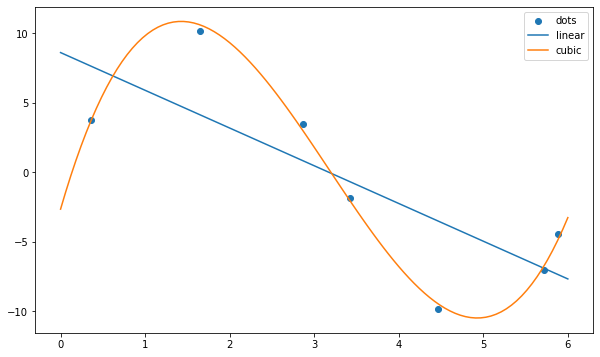

In [7]:
linear = np.poly1d(np.polyfit(x, y, 1))
cubic = np.poly1d(np.polyfit(x, y, 3))

sample = np.linspace(0, 6, 100)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label = 'dots')
plt.plot(sample, linear(sample), label = 'linear')
plt.plot(sample, cubic(sample), label = 'cubic')
plt.legend()
plt.show()

# №5


In [8]:
with h5py.File('data/image_data.hdf', "r") as f:
    A, C = f["A"]["block0_values"][()], f["C"]["block0_values"][()]
    f.close()
    
def mat2vec(A):
    return np.reshape(np.flipud(A), np.prod(A.shape))

def vec2mat(a, shape):
    return np.flipud(np.reshape(a, shape))

(25, 60)

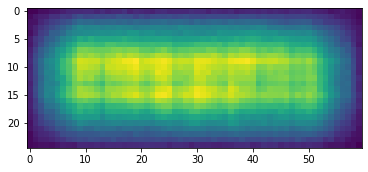

In [9]:
plt.imshow(A)
A.shape

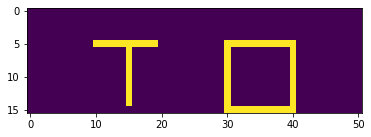

In [10]:
X = np.zeros((16,51))
X[5:15,15] = 1; X[5:15,30] = 1; X[5:15,40] = 1
X[5,10:20] = 1; X[5,30:41] = 1; X[15,30:41] = 1
plt.imshow(X);

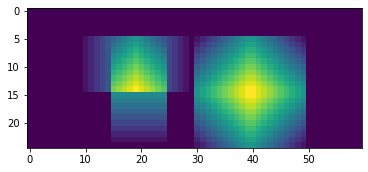

In [11]:
x = mat2vec(X)
plt.imshow(vec2mat(C @ x, (25, 60)));

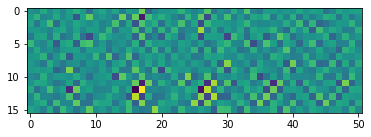

In [12]:
a = mat2vec(A)
a0 = np.linalg.pinv(C) @ a
A0 = vec2mat(a0, (16, 51))
plt.imshow(A0);

In [13]:
u, s, vh = np.linalg.svd(C, full_matrices=False)
C.shape, s.shape

((1500, 816), (816,))

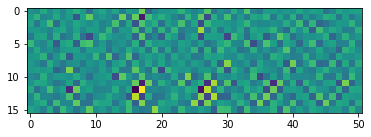

In [14]:
# equivalent to least squares
n = 816
s0 = np.zeros(816)
s0[:n] = s[:n]
C0 = np.dot(u, np.dot(np.diag(s0), vh))
A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
plt.imshow(A0_guess)
plt.show()

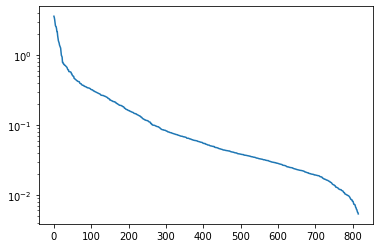

In [15]:
plt.plot(s0)
plt.yscale('log');

In [16]:
def decypher(n: int):
    s0 = np.zeros(816)
    s0[:n] = s[:n]
    C0 = np.dot(u, np.dot(np.diag(s0), vh))
    A0_guess = vec2mat(np.linalg.pinv(C0) @ a, (16, 51))
    plt.imshow(A0_guess)
    plt.show()

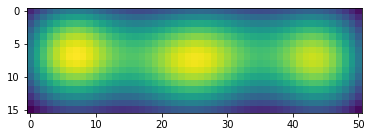

In [17]:
decypher(10)

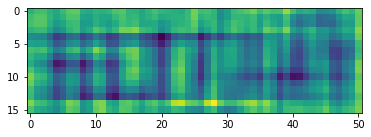

In [18]:
decypher(100)

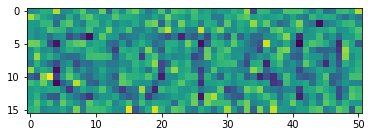

In [19]:
decypher(500)

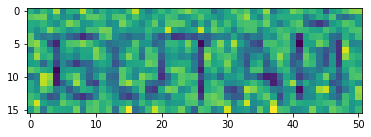

In [20]:
# методом бинпоиска :)
decypher(430)

# №6

![](img/num_3_6.jpg)

# №7

In [21]:
def get_data(file_path: str):
    with h5py.File(file_path, "r") as f:
        dr, r = f["dr"]["block0_values"][()], f["r"]["block0_values"][()]
        ijk = f["measurements"]["block0_values"][()]
        theta = f["measurements"]["block1_values"][()]
        f.close()
    return dr, ijk, theta, r

In [22]:
dr, ijk, theta, r = get_data("data/localization_data_1.hdf")
dr, ijk, theta, r

(array([[-0.0392699,  0.       ],
        [ 0.0392699, -0.0392699],
        [ 0.       ,  0.0392699]]),
 array([[1, 2, 3]], dtype=int32),
 array([[0.706858]]),
 array([[-1.,  0.],
        [ 0.,  1.],
        [ 1.,  0.]]))

In [23]:
x_1, y_1, x_2, y_2, x_3, y_3 = sym.symbols('x_1, y_1, x_2, y_2, x_3, y_3')
r_1 = sym.Matrix([x_1, y_1])
r_2 = sym.Matrix([x_2, y_2])
r_3 = sym.Matrix([x_3, y_3])

dx1, dy1, dx2, dy2, dx3, dy3 = sym.symbols('dx1, dy1, dx2, dy2, dx3, dy3')
dr1 = sym.Matrix([dx1, dy1])
dr2 = sym.Matrix([dx2, dy2])
dr3 = sym.Matrix([dx3, dy3])

A1 = r_1 + dr1
A2 = r_2 + dr2
A3 = r_3 + dr3

nominator = (A1 - A2).dot((A1 - A3)).expand()
denominator_square = (((A1 - A2).dot(A1 - A2))).expand()*((A1 - A3).dot(A1 - A3)).expand()

# чтобы сделать выражение линейным по остаткам, нудно выкинуть dx_i*dx_j, dy_i*dy_j и степени выше
# в предположении малости добавок
subs = [
    [dx1*dx1, 0], [dx1*dx2, 0], [dx1*dx3, 0], 
    [dx2*dx1, 0], [dx2*dx2, 0], [dx2*dx3, 0],
    [dx3*dx1, 0], [dx3*dx2, 0], [dx3*dx3, 0],
    
    [dy1*dy1, 0], [dy1*dy2, 0], [dy1*dy3, 0], 
    [dy2*dy1, 0], [dy2*dy2, 0], [dy2*dy3, 0],
    [dy3*dy1, 0], [dy3*dy2, 0], [dy3*dy3, 0],
    
    [dx1*dx1*dx1, 0], [dx2*dx2*dx2, 0], [dx3*dx3*dx3, 0],
    [dx1*dy1, 0], [dx1*dy2, 0], [dx1*dy3, 0],
    [dx2*dy1, 0], [dx2*dy2, 0], [dx2*dy3, 0],
    [dx3*dy1, 0], [dx3*dy2, 0], [dx3*dy3, 0],
    
       ]
nominator = nominator.subs(subs)
denominator_square = denominator_square.subs(subs)

In [24]:
nominator

2*dx1*x_1 - dx1*x_2 - dx1*x_3 - dx2*x_1 + dx2*x_3 - dx3*x_1 + dx3*x_2 + 2*dy1*y_1 - dy1*y_2 - dy1*y_3 - dy2*y_1 + dy2*y_3 - dy3*y_1 + dy3*y_2 + x_1**2 - x_1*x_2 - x_1*x_3 + x_2*x_3 + y_1**2 - y_1*y_2 - y_1*y_3 + y_2*y_3

In [25]:
denominator_square
# дальше как то линеаризовывать

(2*dx1*x_1 - 2*dx1*x_2 - 2*dx2*x_1 + 2*dx2*x_2 + 2*dy1*y_1 - 2*dy1*y_2 - 2*dy2*y_1 + 2*dy2*y_2 + x_1**2 - 2*x_1*x_2 + x_2**2 + y_1**2 - 2*y_1*y_2 + y_2**2)*(2*dx1*x_1 - 2*dx1*x_3 - 2*dx3*x_1 + 2*dx3*x_3 + 2*dy1*y_1 - 2*dy1*y_3 - 2*dy3*y_1 + 2*dy3*y_3 + x_1**2 - 2*x_1*x_3 + x_3**2 + y_1**2 - 2*y_1*y_3 + y_3**2)